In [1]:
#!pip install imblearn

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder, StandardScaler

from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('exoplanets_cleaned.csv')
df

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_orbeccen,pl_eqt,st_teff,st_rad,st_mass,habitability_class
0,55 Cnc e,55 Cnc,0,2,5,Radial Velocity,0.736544,0.01544,2.080000,0.185565,0.06100,1958.0,5234.0,0.943,0.905,Not-Habitable Terrestrial
1,AU Mic b,AU Mic,0,1,3,Transit,8.463000,0.06450,4.070000,0.363102,0.00000,593.0,3700.0,0.750,0.500,Not-Habitable Terrestrial
2,AU Mic b,AU Mic,1,1,3,Transit,8.463080,0.06490,3.956770,0.353000,0.00577,600.0,3678.0,0.744,0.510,Not-Habitable Terrestrial
3,AU Mic c,AU Mic,0,1,3,Transit,18.859019,0.11010,3.240000,0.289054,0.00000,454.0,3700.0,0.750,0.500,Not-Habitable Terrestrial
4,AU Mic c,AU Mic,1,1,3,Transit,18.859690,0.11080,2.522021,0.225000,0.00338,459.0,3678.0,0.744,0.510,Not-Habitable Terrestrial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15158,XO-5 b,XO-5,0,1,1,Transit,4.187757,0.04940,12.206601,1.089000,NaN,1203.0,5370.0,1.065,0.914,Hot Jupiters
15159,XO-6 b,XO-6,1,1,1,Transit,3.765001,0.08150,23.202630,2.070000,0.00000,1577.0,6720.0,1.930,1.470,Hot Jupiters
15160,XO-7 b,XO-7,1,1,1,Transit,2.864142,0.04421,15.389957,1.373000,0.03800,1743.0,6250.0,1.480,1.405,Hot Jupiters
15161,pi Men c,HD 39091,0,1,3,Transit,6.268340,0.06702,2.060000,0.183781,0.00000,1147.0,5870.0,1.100,1.020,Not-Habitable Terrestrial


In [ ]:
label_encoder = LabelEncoder()
df['habitability_encoded'] = label_encoder.fit_transform(df['habitability_class'])

X = df[['pl_rade', 'pl_eqt', 'pl_orbper', 'pl_orbsmax', 'st_teff', 'st_rad', 'st_mass']].copy()
y = df['habitability_encoded']

In [5]:
nan_df = X.isnull().sum() * 100 / (X.count() + X.isnull().sum())
nan_df

pl_rade       0.000000
pl_eqt        0.000000
pl_orbper     0.000000
pl_orbsmax    0.000000
st_teff       0.296775
st_rad        0.230825
st_mass       0.250610
dtype: float64

In [6]:
for column in X.columns:
    median = X[column].median()
    X[column] = X[column].fillna(median)

nan_df = X.isnull().sum() * 100 / (X.count() + X.isnull().sum())
nan_df

pl_rade       0.0
pl_eqt        0.0
pl_orbper     0.0
pl_orbsmax    0.0
st_teff       0.0
st_rad        0.0
st_mass       0.0
dtype: float64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=111)

In [8]:
smote = SMOTE(random_state=111)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def train_base_model(X_train, X_test, y_train, y_test):

    dec_tree = DecisionTreeClassifier(random_state = 777)
    dec_tree.fit(X_train, y_train)

    dec_y_pred = dec_tree.predict(X_test)

    dec_accuracy = accuracy_score(y_test, dec_y_pred)
    dec_precision = precision_score(y_test, dec_y_pred, average='macro', pos_label=1)
    dec_recall = recall_score(y_test, dec_y_pred, average='macro', pos_label=1)

    ConfusionMatrixDisplay(confusion_matrix(y_test, dec_y_pred), display_labels=[str(c) for c in dec_tree.classes_]).plot()

    rf = RandomForestClassifier(random_state=777)
    rf.fit(X_train, y_train)

    rf_y_pred = rf.predict(X_test)

    rf_accuracy = accuracy_score(y_test, rf_y_pred)
    rf_precision = precision_score(y_test, rf_y_pred, average='macro', pos_label=1)
    rf_recall = recall_score(y_test, rf_y_pred, average='macro', pos_label=1)

    ConfusionMatrixDisplay(confusion_matrix(y_test, rf_y_pred), display_labels=[str(c) for c in rf.classes_]).plot()

    print(f"Decision Tree Accuracy: {(dec_accuracy) * 100:.2f}%, Precision: {(dec_precision) * 100:.2f}%, Recall: {(dec_recall) * 100:.2f}%")
    print(f"Random Forest Accuracy: {(rf_accuracy) * 100:.2f}%, Precision: {(rf_precision) * 100:.2f}%, Recall: {(rf_recall) * 100:.2f}%")

    return dec_accuracy, rf_accuracy

Decision Tree Accuracy: 99.93%, Precision: 99.55%, Recall: 99.26%
Random Forest Accuracy: 99.97%, Precision: 99.77%, Recall: 99.63%


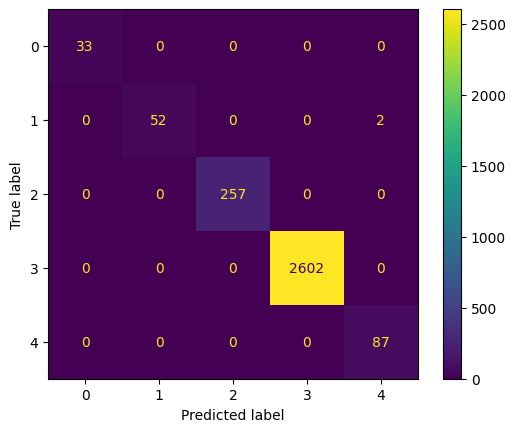

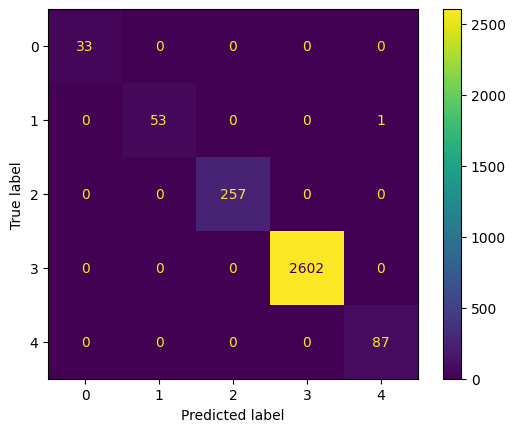

In [33]:
base_dt_acc, base_rf_acc = train_base_model(X_train_balanced, X_test, y_train_balanced, y_test)